<a href="https://colab.research.google.com/github/daffakanz/cocoa4-PCD/blob/main/pra_proses_cocoa_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from skimage.io import imread
from skimage import io
from skimage.color import rgb2gray

import imageio
import skimage
import cv2
import glob
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Pra Proses**

In [ ]:
cocoa_list = []

path = "/content/drive/MyDrive/Sem6/PCD/Cocoa_Ripeness_Dataset/*.*"
for file in sorted(glob.glob(path)):
  print(file)

  a = cv2.imread(file)
  cocoa_list.append(a)

/content/drive/MyDrive/Sem6/PCD/Cocoa_Ripeness_Dataset/I1.jpg
/content/drive/MyDrive/Sem6/PCD/Cocoa_Ripeness_Dataset/I10.jpg
/content/drive/MyDrive/Sem6/PCD/Cocoa_Ripeness_Dataset/I100.jpg
/content/drive/MyDrive/Sem6/PCD/Cocoa_Ripeness_Dataset/I101.jpg
/content/drive/MyDrive/Sem6/PCD/Cocoa_Ripeness_Dataset/I102.jpg
/content/drive/MyDrive/Sem6/PCD/Cocoa_Ripeness_Dataset/I103.jpg
/content/drive/MyDrive/Sem6/PCD/Cocoa_Ripeness_Dataset/I104.jpg
/content/drive/MyDrive/Sem6/PCD/Cocoa_Ripeness_Dataset/I105.jpg
/content/drive/MyDrive/Sem6/PCD/Cocoa_Ripeness_Dataset/I106.jpg
/content/drive/MyDrive/Sem6/PCD/Cocoa_Ripeness_Dataset/I107.jpg
/content/drive/MyDrive/Sem6/PCD/Cocoa_Ripeness_Dataset/I108.jpg
/content/drive/MyDrive/Sem6/PCD/Cocoa_Ripeness_Dataset/I109.jpg
/content/drive/MyDrive/Sem6/PCD/Cocoa_Ripeness_Dataset/I11.jpg
/content/drive/MyDrive/Sem6/PCD/Cocoa_Ripeness_Dataset/I110.jpg
/content/drive/MyDrive/Sem6/PCD/Cocoa_Ripeness_Dataset/I111.jpg
/content/drive/MyDrive/Sem6/PCD/Cocoa_Ripene

In [ ]:
len(cocoa_list)

476

In [ ]:
# Menghapus file duplikat
import os
from filecmp import cmp

def remove_duplicate_files(directory):
    file_list = []
    duplicate_files = []

    for root, dirs, files in os.walk(directory):
        for file_name in files:
            file_path = os.path.join(root, file_name)
            file_list.append(file_path)

    for i in range(len(file_list)):
        for j in range(i + 1, len(file_list)):
            if cmp(file_list[i], file_list[j]):
                duplicate_files.append(file_list[j])

    for file_path in duplicate_files:
        os.remove(file_path)
        print("File removed:", file_path)

# Contoh penggunaan
directory_path = "/content/drive/MyDrive/Sem6/PCD/Cocoa_Ripeness_Dataset"
remove_duplicate_files(directory_path)

In [ ]:
len(cocoa_list)

476

In [ ]:
cocoa_labels = []
for file in sorted(glob.glob(path)):
    print(file)

    # a = cv2.imread(file)
    # cocoa_list.append(a)

    label = os.path.basename(file)[0]  # Get the first character of the file name
    if label == "I":
        cocoa_labels.append("Immature")
    elif label == "M":
        cocoa_labels.append("Mature")
    elif label == "S":
        cocoa_labels.append("Overmature")
    else:
        cocoa_labels.append("Unknown")

/content/drive/MyDrive/Sem6/PCD/Cocoa_Ripeness_Dataset/I1.jpg
/content/drive/MyDrive/Sem6/PCD/Cocoa_Ripeness_Dataset/I10.jpg
/content/drive/MyDrive/Sem6/PCD/Cocoa_Ripeness_Dataset/I100.jpg
/content/drive/MyDrive/Sem6/PCD/Cocoa_Ripeness_Dataset/I101.jpg
/content/drive/MyDrive/Sem6/PCD/Cocoa_Ripeness_Dataset/I102.jpg
/content/drive/MyDrive/Sem6/PCD/Cocoa_Ripeness_Dataset/I103.jpg
/content/drive/MyDrive/Sem6/PCD/Cocoa_Ripeness_Dataset/I104.jpg
/content/drive/MyDrive/Sem6/PCD/Cocoa_Ripeness_Dataset/I105.jpg
/content/drive/MyDrive/Sem6/PCD/Cocoa_Ripeness_Dataset/I106.jpg
/content/drive/MyDrive/Sem6/PCD/Cocoa_Ripeness_Dataset/I107.jpg
/content/drive/MyDrive/Sem6/PCD/Cocoa_Ripeness_Dataset/I108.jpg
/content/drive/MyDrive/Sem6/PCD/Cocoa_Ripeness_Dataset/I109.jpg
/content/drive/MyDrive/Sem6/PCD/Cocoa_Ripeness_Dataset/I11.jpg
/content/drive/MyDrive/Sem6/PCD/Cocoa_Ripeness_Dataset/I110.jpg
/content/drive/MyDrive/Sem6/PCD/Cocoa_Ripeness_Dataset/I111.jpg
/content/drive/MyDrive/Sem6/PCD/Cocoa_Ripene

In [ ]:
len(cocoa_list)

476

In [ ]:
# Update cocoa_norm_list after removing duplicates
cocoa_gray_list = []
cocoa_norm_list = []

for cocoa_img in cocoa_list:
    gray_img = cv2.cvtColor(cocoa_img, cv2.COLOR_BGR2GRAY)
    gray_img = cv2.resize(gray_img,(100,100))
    gray_img_dct = cv2.dct(np.float32(gray_img))
    print(gray_img.shape)
    norm_img = gray_img_dct
    # / 255.0  # Normalization in the range of 0-1
    cocoa_gray_list.append(gray_img.flatten())
    cocoa_norm_list.append(norm_img.flatten())

x = np.array(cocoa_norm_list)
y = np.array(cocoa_labels)

(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)

In [ ]:
x.shape

(476, 10000)

In [ ]:
y.shape

(476,)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score

Mengecek jumlah data

In [ ]:
np.unique(y,return_counts=True)

(array(['Immature', 'Mature', 'Overmature'], dtype='<U10'),
 array([263,  76, 137]))

In [ ]:


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


neighbor = 100
flist = []
acclist = []
kneigh = []
for k in range(3, neighbor):
  print(k)
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_train, y_train)

  # Predict on the test set
  y_pred = knn_model.predict(X_test)

  # Evaluate accuracy
  f1 = f1_score(y_test, y_pred, average='macro')
  acc = accuracy_score(y_test, y_pred)
  flist.append(f1)
  acclist.append(acc)
  kneigh.append(k)
  print("f1 score: {:.2f}".format(f1))
  print("acc: {:.2f}".format(accuracy_score(y_test, y_pred)))

3
f1 score: 0.76
acc: 0.83
4
f1 score: 0.66
acc: 0.80
5
f1 score: 0.68
acc: 0.82
6
f1 score: 0.63
acc: 0.79
7
f1 score: 0.67
acc: 0.84
8
f1 score: 0.67
acc: 0.83
9
f1 score: 0.64
acc: 0.84
10
f1 score: 0.69
acc: 0.83
11
f1 score: 0.68
acc: 0.85
12
f1 score: 0.70
acc: 0.84
13
f1 score: 0.68
acc: 0.84
14
f1 score: 0.66
acc: 0.82
15
f1 score: 0.67
acc: 0.83
16
f1 score: 0.65
acc: 0.82
17
f1 score: 0.63
acc: 0.82
18
f1 score: 0.65
acc: 0.82
19
f1 score: 0.66
acc: 0.83
20
f1 score: 0.65
acc: 0.82
21
f1 score: 0.66
acc: 0.83
22
f1 score: 0.66
acc: 0.83
23
f1 score: 0.66
acc: 0.83
24
f1 score: 0.66
acc: 0.83
25
f1 score: 0.64
acc: 0.83
26
f1 score: 0.66
acc: 0.83
27
f1 score: 0.63
acc: 0.82
28
f1 score: 0.66
acc: 0.83
29
f1 score: 0.66
acc: 0.83
30
f1 score: 0.70
acc: 0.84
31
f1 score: 0.70
acc: 0.84
32
f1 score: 0.70
acc: 0.84
33
f1 score: 0.66
acc: 0.83
34
f1 score: 0.70
acc: 0.84
35
f1 score: 0.70
acc: 0.84
36
f1 score: 0.70
acc: 0.84
37
f1 score: 0.70
acc: 0.84
38
f1 score: 0.69
acc: 0.83

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
X_test.shape

(96, 10000)

In [ ]:
np.unique(y_test,return_counts=True)

(array(['Immature', 'Mature', 'Overmature'], dtype='<U10'),
 array([52, 16, 28]))

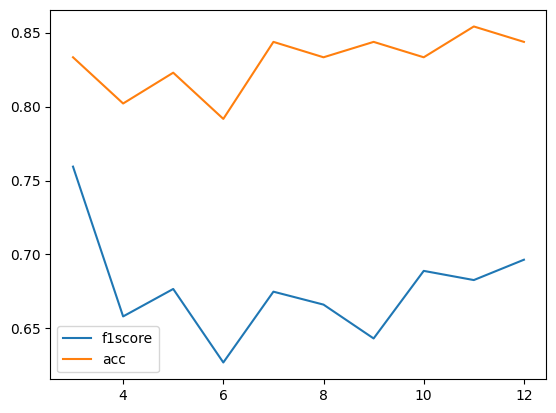

In [ ]:
plt.plot(kneigh[:10],flist[:10])
plt.plot(kneigh[:10],acclist[:10])
plt.legend(['f1score','acc'])

In [ ]:
x[0].shape

(10000,)

In [ ]:
def prediksi(img_path, model):
    img = cv2.imread(img_path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_img = cv2.resize(gray_img, (100, 100)).reshape(1, 100 * 100)
    gray_img_dct = cv2.dct(np.float32(gray_img))
    gray_img = gray_img_dct / 255.0
    prediksi = model.predict(gray_img)

    plt.imshow(gray_img.reshape(100, 100), cmap='gray')
    plt.title('prediksi knn: ' + str(prediksi[0]))  # Convert prediksi to a string


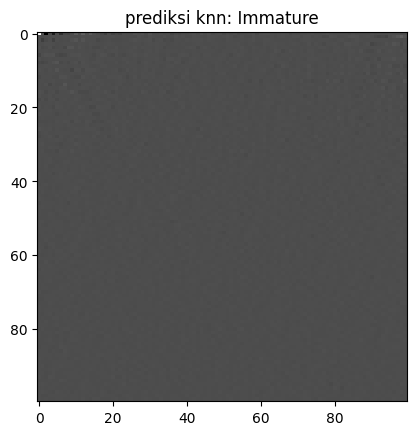

In [ ]:
prediksi('/content/drive/MyDrive/Sem6/PCD/Cocoa_Ripeness_Dataset/M69.jpg',knn_model)